https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/


# GREAT STUFF

('---', '450', 450)
Last-GRU-network-loss-1.2404-plot-for-Directory-kolbrin_2018-0726204235.png


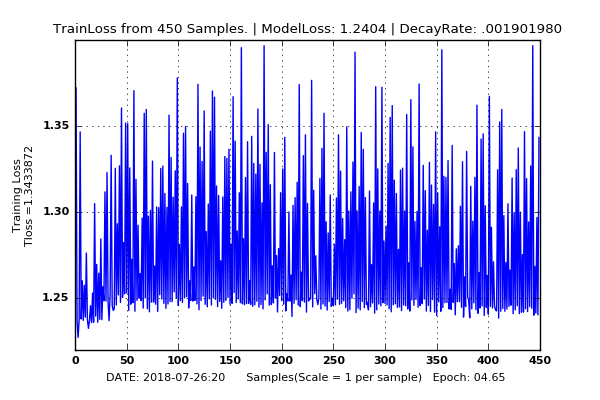

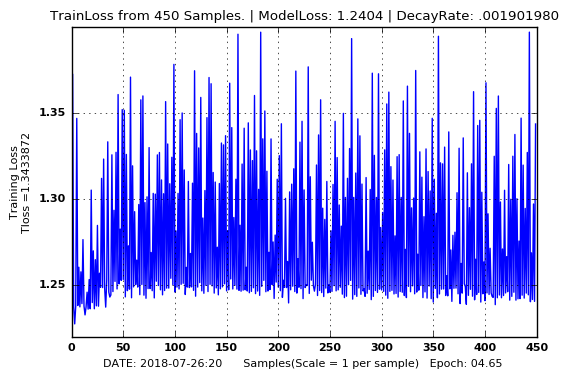

In [19]:
#%%writefile mkplot.py
#!/usr/local/bin/python
from __future__ import division
from PIL import Image
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np 
#if len(sys.argv)==1: sys.exit("\n=========================\nThe directory of *.t7 files required. Example:\npython mktext-n-plot.py uranbible\n=========================\n")
directory = "kolbrin"
#directory ="textperiment"
filenameD = directory+"_.dat"
# Function to get loss from the model filename in the list 'samp'  
def trainL(iteR):
    for w in iteR:leng = len(w)
    for w in iteR:W = w[leng-49:leng-40]
    return W
def rateloss(iteR):
    for x in iteR:leng = len(x)
    for x in iteR:X= x[leng-9:leng-3]
    return X
def decrate(iteR):
    for y in iteR:leng = len(y)
    for y in iteR:Y = y[leng-89:leng-78]
    return Y
def epoch(iteR):
    for z in iteR:leng = len(z)
    for z in iteR:Z = z[leng-30:leng-25]
    return Z
try:
    os.remove(filenameD)
except:
    pass
# built is list ' samp ' of all models in a directory
samp = []
cwd = os.getcwd()
PATH = cwd+"/"+directory+"/"
files = glob.glob(PATH+"BASE*.t7")
#files = glob.glob(PATH+"lm_*.t7")
files.sort(key=os.path.getmtime)
#line = ("\n".join(files))
line = ("\n".join(files))
samp.append(line)
# clear the memory of any prior files that may have been created
# prevents the accidental printing of memory to the file 
try:
    del line
    del li
except:
    pass
fn = open(filenameD, "a")
count = 0
for line in samp:
    #line = line.replace("\n","")
    line = line.split()    
    for li in line:
        count = count +1
        if len(li)>50:
            li0 = li[-9:-3]
            li1 = li[-49:-37]
            #print "0: ",li0
            #print "1: ",li1
            li0 = li0.replace("s","")
            li0 = li0.replace(",","")
            li0 = li0.replace("_","")            
            li1 = li1.replace("s","")
            li1 = li1.replace(",","")
            li1 = li1.replace("_","")
            if count>1:fn.write(", ")
            fn.write(li0)
            fn.write(", ")
            fn.write(li1)
fn.close() 
f = open(filenameD).read()
f = str(f).split()
a = len(f)
A= str(a)
b = int(a)+1
print ("---",A,a)
c = a / b
c = 12
#np.arange(0.0, a, c)
#steps = 1
#c = range(b,steps)

iteR = samp 
Tloss = trainL(iteR)
   
LosR = rateloss(iteR) 
DecR = decrate(iteR)
DecR = DecR.replace("_","");DecR.replace("e","0");DecR.replace("s","")

E = epoch(iteR)
#print "EPOCH",E
fname = filenameD
s = np.loadtxt(fname, dtype='float', comments='#', delimiter=",")
#t = np.arange(0.0, a, c)
#t = np.arange(0.0, b, c)
e = len(s)
ss = range(0,e)
aa = np.array(ss)
np.save('s-Numy-plot', aa)
#t = np.arange(0.0, aa, c)

# fig = plt.figure() 
# ax = fig.add_subplot(111)
# Using plt.subplots is equivalent to using the two lines above.
#my_dpi = 150
#plt.figure(figsize=(800/my_dpi, 1000/my_dpi), dpi=my_dpi)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 8}

matplotlib.rc('font', **font)





fig, ax = plt.subplots(dpi=100)

ax.plot(aa, s)
DT = time.strftime("%Y-%m-%d:%H")
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)   Epoch: '+E+' ', ylabel='Training Loss\n'+'Tloss ='+Tloss, \
title='TrainLoss from '+A+' Samples. | ModelLoss: '+LosR+" | DecayRate: "+DecR[1:] )

ax.grid()
tm = time.strftime("%Y-%m%d%H%M%S")
Filename = "Last-GRU-network-loss-"+LosR+"-plot-for-Directory-"+directory+"_"+tm+".png"
print (Filename)
fig.savefig(Filename)
im = Image.open(Filename)
im

# Separate the odd from even lines in 'kolbrin_.dat'
## Assign even rows to list mlGroup and odd rows to tlGroup

In [20]:
from time import sleep
count = 0
mlGroup = []
tlGroup = []
f = open("kolbrin_.dat").read()
data = f.split(",")
for line in data:
    
    count = count +1
    if count %2 == 0:
        if count<10:print (count,"ModelLoss: ",line)
        mlGroup.append(line)
    if count %2 != 0:
        if count<10:print (count,"    TrainingLoss: ",line )
        tlGroup.append(line)


(1, '    TrainingLoss: ', '1.2373')
(2, 'ModelLoss: ', ' 1.37234596')
(3, '    TrainingLoss: ', ' 1.2371')
(4, 'ModelLoss: ', ' 1.22731842')
(5, '    TrainingLoss: ', ' 1.2377')
(6, 'ModelLoss: ', ' 1.34664100')
(7, '    TrainingLoss: ', ' 1.2380')
(8, 'ModelLoss: ', ' 1.26020501')
(9, '    TrainingLoss: ', ' 1.2372')


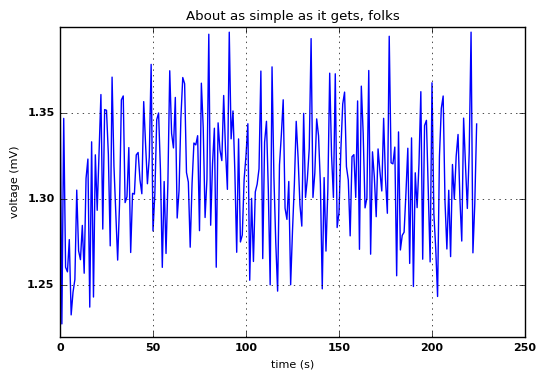

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
t = mlGroup
l = len(t)
# Data for plotting
#t = np.arange(mlGroup)
s = range(l)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots(dpi=100)
ax.plot(s, t)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()


# Plot Training Loss

225
225
450


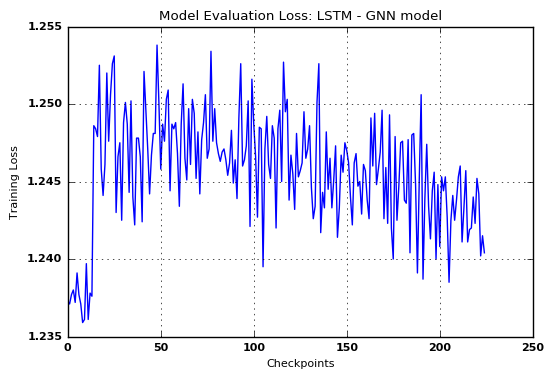

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import convolve
from scipy.signal import fftconvolve

t = tlGroup
l = len(t)
# Data for plotting

s = range(l)
print (len(t))
array = map(float, mlGroup)
tt = np.asarray(array)
print (len(mlGroup))

#sm =  fftconvolve(vals, gs)





#smoothed = convolve(array, [1/5] * 5, mode='valid')
#smoothed = convolve(array, [1/2 * 2] , mode='valid')
#ss = len(smoothed)
#print (len(smoothed))
print (len(ss))
fig, ax = plt.subplots(dpi=100)
ax.plot(s, t)

#ss = range(len(smoothed))

#ax.plot(ss, smoothed, color="red")
ax.set(xlabel='Checkpoints', ylabel='Training Loss',
       title='Model Evaluation Loss: LSTM - GNN model')
ax.grid()

fig.savefig("test2.png")
plt.show()


# Plot Smooth

## Guassian smooth:
https://www.swharden.com/wp/2008-11-17-linear-data-smoothing-in-python/

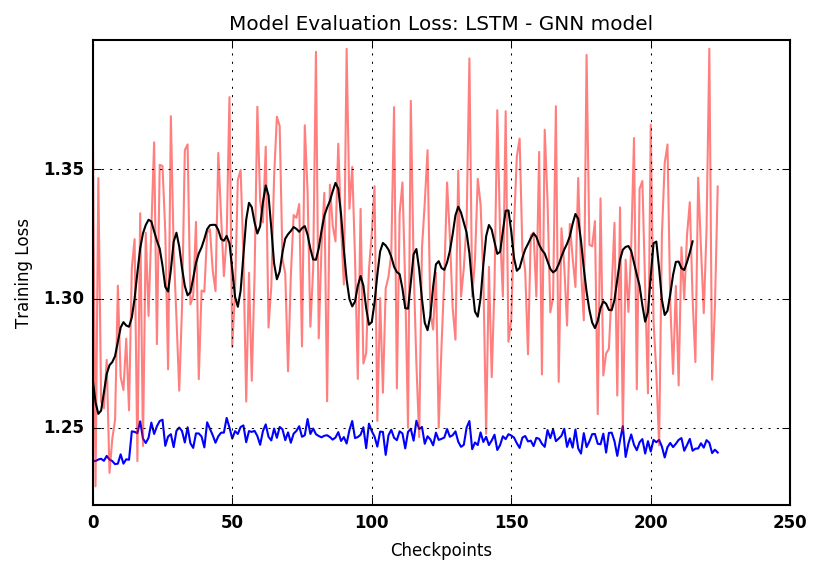

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import convolve
from scipy.signal import fftconvolve

t = tlGroup[-400:]
lent = len(t)
# Data for plotting
s = range(lent)
#print (s)

tt = mlGroup[-400:]
lentt = len(tt)
# Data for plotting
ss = range(lentt)
#print(ss)

def smoothListGaussian(list,degree=5):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  



array = map(float, mlGroup[-400:])
Larray = list(array)
ar = len(Larray)



smoothed = smoothListGaussian(Larray,degree=5)
sm = len(smoothed)
su = range(sm)
#print (su, sm)

fig, ax = plt.subplots(dpi=150)
ax.plot(s, t)
ax.plot(ss, tt, color="red", alpha=.5)
#ss = range(len(smoothed))
ax.plot(su, smoothed, color="black")
#ax.plot(ss, smoothed, color="red")
ax.set(xlabel='Checkpoints', ylabel='Training Loss',
       title='Model Evaluation Loss: LSTM - GNN model')
ax.grid()

fig.savefig("test4.png")
plt.show()


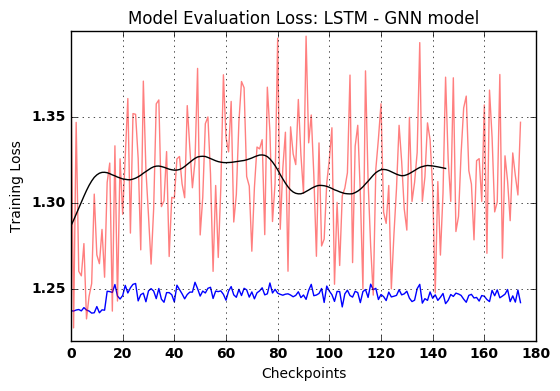

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import convolve
from scipy.signal import fftconvolve

t = tlGroup
lent = len(t)
# Data for plotting
s = range(lent)
#print (s)

tt = mlGroup
lentt = len(tt)
# Data for plotting
ss = range(lentt)
#print(ss)

def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  



array = map(float, mlGroup)
Larray = list(array)
ar = len(Larray)



smoothed = smoothListGaussian(Larray,degree=15)
sm = len(smoothed)
su = range(sm)
#print (su, sm)

fig, ax = plt.subplots(dpi=100)
ax.plot(s, t)
ax.plot(ss, tt, color="red", alpha=.5)
#ss = range(len(smoothed))
ax.plot(su, smoothed, color="black")
#ax.plot(ss, smoothed, color="red")
ax.set(xlabel='Checkpoints', ylabel='Training Loss',
       title='Model Evaluation Loss: LSTM - GNN model')
ax.grid()

fig.savefig("test.png")
plt.show()


175
175
174
[-0.4502245  -0.45210096 -0.44970024 -0.45620401 -0.45503162 -0.45685675
 -0.45908643 -0.45758927 -0.4532618  -0.45204607 -0.45499472 -0.45391519
 -0.4544893  -0.45249613 -0.44765729 -0.45311291 -0.45238234 -0.45195513
 -0.45250591 -0.44882946 -0.44872327 -0.443817   -0.44707091 -0.44770844
 -0.44267413 -0.44457498 -0.45032016 -0.44704353 -0.44365195 -0.44935474
 -0.45335013 -0.45304757 -0.44625445 -0.44165166 -0.44600765 -0.45028513
 -0.44795316 -0.45031137 -0.45225215 -0.44977835 -0.44814758 -0.44638263
 -0.44744451 -0.44919349 -0.44587326 -0.44376399 -0.4472449  -0.4478084
 -0.44274979 -0.4458721  -0.45134053 -0.44662456 -0.44321529 -0.44534544
 -0.45188938 -0.4523788  -0.45179014 -0.45186194 -0.44411778 -0.44200863
 -0.44527888 -0.44375337 -0.4467242  -0.45067062 -0.44641595 -0.44162544
 -0.4401881  -0.44421375 -0.44838205 -0.45154855 -0.45160996 -0.44719501
 -0.44555751 -0.44524611 -0.44888217 -0.44665649 -0.44228842 -0.4479823
 -0.45017044 -0.44240144 -0.44435087 -0.4

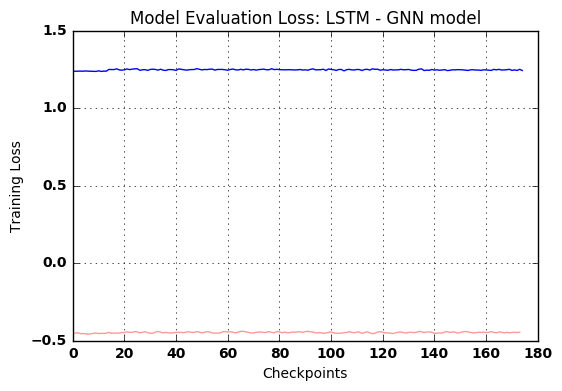

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve
from scipy.signal import fftconvolve

t = tlGroup
l = len(t)
# Data for plotting
#tt = np.arange(mlGroup)
s = range(l)
print (len(t))
array = map(float, mlGroup)
print (len(mlGroup))

class Smooth(object):

    def enlarge_smooth(self):
        # other stuff
        fftconvolve(vals, gs)




ss = len(smoothed)
#smoothed = convolve(array, [1/5] * 5, mode='valid')
smoothed = convolve(array, [ss/2] * 2 , mode='valid')

#smoothed = fftconvolve(vals, gs)

print (len(smoothed))

fig, ax = plt.subplots(dpi=100)
ax.plot(s, t)
smooth = (smoothed*.001)-.64
ss = range(len(smoothed))
print smooth
ax.plot(ss, smooth, color="red" , alpha = .4)
ax.set(xlabel='Checkpoints', ylabel='Training Loss',
       title='Model Evaluation Loss: LSTM - GNN model')
ax.grid()

fig.savefig("test.png")
plt.show()


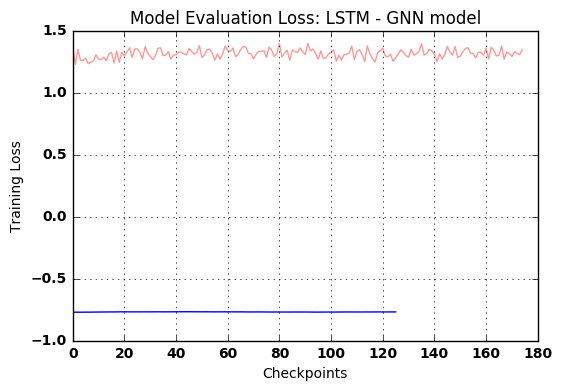

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
array = map(float, mlGroup)
#array = array[-20:]
ss = len(array)
#smoothed = convolve(array, [ss/100] * 100, mode='valid')
smoothed = convolve(array, [ss/50] * 50, mode='valid')
Smooth = (((smoothed*.01)+1)*.1)-.73
sm = range(len(Smooth))
Y = range(len(array))
fig, ax = plt.subplots(dpi=100)
ax.plot(sm, Smooth-.37)

ax.plot(Y, array, color="red" , alpha = .4)
ax.set(xlabel='Checkpoints', ylabel='Training Loss',
       title='Model Evaluation Loss: LSTM - GNN model')
ax.grid()

fig.savefig("Stest.png")
plt.show()


In [9]:
import numpy as np
Aray= open("kolbrin_.dat").read()
NA = np.asarray(Aray.split(','), dtype=float)
#na = NA[:-8]
NA.size
rs = np.reshape(NA, (-1,6))
#print rs
#np.ravel(rs)[11]

#print (rs[:,3])


#el: 1.2445 Ep: 55.52 tl: 1.27316794 siz: 128 0.00071874720
#s = np.loadtxt(fname, dtype='float', comments='#', delimiter=",")
#bb = np.reshape(s, (-1,6))
"""
evaluation loss (s[:48][0:1])
training loss (s[:48][0:2])
epoch (s[:48][0:3])
print (s[:48][0:4])
size (s[:48][0:5])
learning rate (s[:48][0:6])
1.2508 1.33412896 3.20 1.3341289 128 0.0012000000
"""
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  

t = (rs[:,1])
s = range(len(t))

Larray = (rs[:,1])
ar = len(Larray)
arr = range(ar)

tim = (rs[:,5])*500
stim = len(tim)
sim = range(stim)

smoothed = smoothListGaussian(Larray,degree=15)
sm = len(smoothed)
su = range(sm)
fig, ax = plt.subplots()
ax.plot(s, t, alpha=.5 )
ax.plot(arr, Larray+.3, color="red", alpha=.5)
ss = range(len(smoothed))
ax.plot(su, smoothed, color="black")
#ax.plot.loglog(sim, tim, basex=2)

ax.set(xlabel='Checkpoints', ylabel='Training Loss',
       title='Model Evaluation Loss: LSTM - GNN model')
ax.grid()

fig.savefig("test.png")
plt.show()


ValueError: cannot reshape array of size 350 into shape (6)

[ 1.2529  1.2558  1.2587 ...,  2.7762  2.7791  2.782 ]


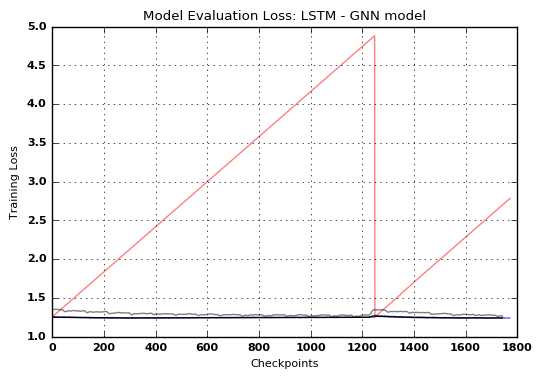

In [22]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import convolve
from scipy.signal import fftconvolve
sc = np.load('TOTAL.npy')
#sc = sc[-400:]
sc.shape
length = len(sc)
ln = range(length)
EvaluationLoss = sc[:,0]
Epoch = sc[:,1]
Trainingloss = sc[:,2]
A = sc[:,3]
LearningRate = sc[:,4]

#t = tlGroup
t = sc[:,0]
lent = len(t)
# Data for plotting
s = range(lent)
#print (s)

#tt = mlGroup
tt = sc[:,1]
lentt = len(tt)
# Data for plotting
ss = range(lentt)
#print(ss)

def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  



#array = map(float, mlGroup)
array = sc[:,0]
Larray = list(array)
#print Larray
ar = len(Larray)
trainingloss = list(Trainingloss)


smoothed = smoothListGaussian(Larray,degree=15)
sm = len(smoothed)
su = range(sm)

smoothed2 = smoothListGaussian(trainingloss,degree=15)
tlinc = range(len(smoothed2))
#print (su, sm)
Ep = (Epoch/100)+1.25
print Ep
fig, ax = plt.subplots(dpi=100)
ax.plot(s, t, alpha = .5)
#ax.plot(ss, Trainingloss, color="red", alpha=.5)
ax.plot(ss, Ep, color="red", alpha=.5)
#ax.plot(ss, LearningRate*500+1, color="green", alpha=.5)
# print LearningRate*500+1
ax.plot(tlinc, smoothed2, color="black", alpha=.5)

#                  ss = range(len(smoothed))
ax.plot(su, smoothed, color="black")
#                  ax.plot(ss, smoothed, color="red")
ax.set(xlabel='Checkpoints', ylabel='Training Loss',
       title='Model Evaluation Loss: LSTM - GNN model')
ax.grid()

fig.savefig("test.png")
plt.show()


In [10]:
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
#                                                                                           9     3
import sqlite3
count = 0
LS = []
conn = sqlite3.connect("alice.db")
c = conn.cursor()
TOTAL = []
badchar = "seh_,rt"
c.execute('SELECT max(rowid) FROM quotes')
ID = c.fetchone()[0]
print ID

for row in c.execute("SELECT ROWID,content from quotes"):
    count = count +1
    inc = 0
    if count %2 == 0 and len(row[1])>3:
        inc = inc+1
        #print row[1]
        ls0 = row[1][-9:-3]
        ls1 = row[1][-31:-24]
        ls1 = str(ls1).translate(None, badchar)
        ls2 = row[1][-49:-36]
        ls2 = str(ls2).translate(None, badchar)
        ls3 = row[1][-65:-58]
        ls3 = str(ls3).translate(None, badchar)
        ls4 = row[1][-89:-74]
        ls4 = str(ls4).translate(None, badchar)
        ls0 = float(ls0);ls1 = float(ls1);ls2 = float(ls2)
        ls3 = float(ls3);ls4 = float(ls4)      
        if row[0]==2:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)        
        if row[0]>2 and row[0]<ID-1:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)
        if row[0]==ID-1:
            tot = ls0,ls1,ls2,ls3,ls4
            TOTAL.append(tot)    
        #print row[0],tot
#print count
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
# 

4169


In [24]:
import numpy as np
tt = np.asarray(TOTAL)
np.save("TOTAL", tt)

print tt[:,0]
print tt[:,1]
print tt[:,2]
print tt[:,3]
print tt[:,4]




[ 1.2569  1.2557  1.2507 ...,  1.239   1.2419  1.2376]
[   0.29    0.58    0.87 ...,  152.62  152.91  153.2 ]
[ 1.36140064  1.30547096  1.35716284 ...,  1.30342329  1.25057716
  1.25674478]
[ 128.  128.  128. ...,  128.  128.  128.]
[ 0.0012      0.0012      0.0012     ...,  0.00047519  0.00047519
  0.00047043]


In [48]:
#matplotlib.colors
#b : blue. g : green. r : red. c : cyan. m : magenta. y : yellow. k : black. w : white.
import numpy as np
import matplotlib.pyplot as plt
sc = np.load("s-Numy-plot-k2.npy")
#sc = np.load("aa-Numy-plot-k2.npy")
# Odd numbers of the single column


sc = sc[:-1]
x = sc[1:][::2]
y = sc[0:][::2]


RNG = len(sc)/2
rng = len(sc)/20
raw = (sc - 0.5).cumsum()

#smooth = x.reshape(-1,1).mean(axis=1)
smooth = x.reshape(-1,10).mean(axis=1)
x1 = np.linspace(0, 1, RNG)
x2 = np.linspace(0, 1, rng)
fig = plt.figure()


ax.plot(aa, s)
DT = time.strftime("%Y-%m-%d:%H")
#ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',Tloss="Tloss"
#       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )
fig, ax = plt.subplots(dpi=100)
ax.grid()
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',
       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )

fig.patch.set_facecolor('xkcd:salmon')

plt.plot(x1, x, color= 'lightblue')
plt.plot(x2, smooth, color= 'red')
#print len(x2)
#print len(smooth)
#print smooth

#plt.show()

ValueError: cannot reshape array of size 2 into shape (10)

/home/jack/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


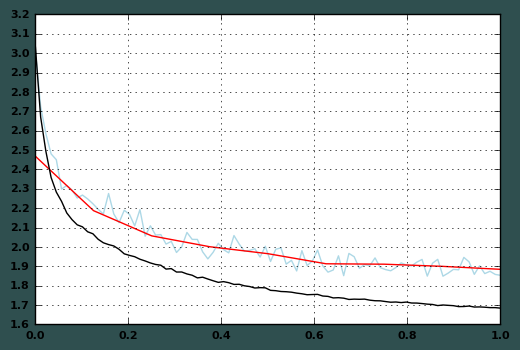

In [84]:
#%%writefile testDdataOdd.py
#b : blue. g : green. r : red. c : cyan. m : magenta. y : yellow. k : black. w : white.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import time
from pylab import *
#sc = np.load('s-Numy-plot-kolbrin.npy')
#sc = np.load('/home/jack/char-rnn/)
sc = np.load('testD.dataOdd.npy')
# Odd numbers of the single column
#sc = sc[:260]
#sc = sc[:56]
x = sc[:,2] #traing loss
# x = sc[:,3] # linear scale nothing good
y = sc[:,4 ]# Evaluation loss



#x = sc[1:][::2]
#y = sc[0:][::2]
RNG = len(sc)
rng = len(sc)/10
raw = (sc - 0.5).cumsum()

#smooth = x.reshape(-1,51).mean(axis=1)
smooth = x.reshape(-1,10).mean(axis=1)
x1 = np.linspace(0, 1, RNG)
x2 = np.linspace(0, 1, rng)
tick_spacing = .1
fig = plt.figure()
#ax.plot(aa, s)
DT = time.strftime("%Y-%m-%d:%H")
#ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',Tloss="Tloss"
#       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )
#fig, ax = subplot(111, axisbg='lightgray', alpha=.1)
fig, ax = plt.subplots(dpi=100)
ax.grid()
#ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',
#       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )

#ax.set_facecolor('lightblue')
#plt.rcParams['axes.facecolor'] = 'yellow'
fig.patch.set_facecolor('darkslategray')
plt.plot(x1, x, color= 'lightblue')
plt.plot(x2, smooth, color= 'red')
plt.plot(x1, y, color= 'black')
#print len(x2)
#print len(smooth)
#print smooth
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

In [82]:
# WORKS 
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
#%matplotlib inline 
figure = Figure()
canvas = FigureCanvas(figure)
axes = figure.add_subplot(1, 1, 1, axisbg='red')
axes.plot([1,2,3])
canvas.print_figure('red-bg.png')
canvas

In [83]:
!showme red-bg.png

4183
2091
2091


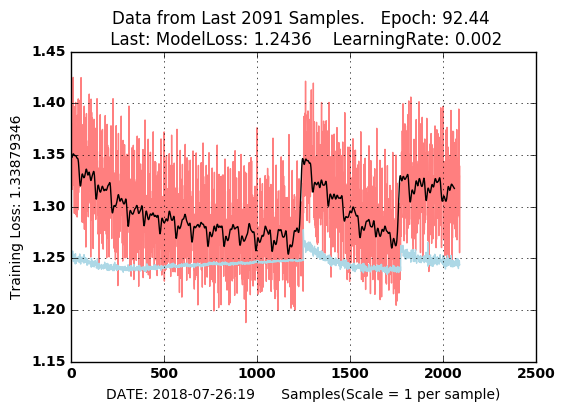

In [12]:
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
#                                                                                           9     3
import sqlite3
count = 0
LS = []
conn = sqlite3.connect("alice.db")
c = conn.cursor()
TOTAL = []
badchar = "seh_,rt"
c.execute('SELECT max(rowid) FROM quotes')
ID = c.fetchone()[0]
print ID

for row in c.execute("SELECT ROWID,content from quotes"):
    count = count +1
    inc = 0
    if count %2 == 0 and len(row[1])>3:
        inc = inc+1
        #print row[1]
        ls0 = row[1][-9:-3]
        ls1 = row[1][-31:-24]
        ls1 = str(ls1).translate(None, badchar)
        ls2 = row[1][-49:-36]
        ls2 = str(ls2).translate(None, badchar)
        ls3 = row[1][-65:-58]
        ls3 = str(ls3).translate(None, badchar)
        ls4 = row[1][-89:-74]
        ls4 = str(ls4).translate(None, badchar)
        ls0 = float(ls0);ls1 = float(ls1);ls2 = float(ls2)
        ls3 = float(ls3);ls4 = float(ls4)      
        if row[0]==2:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)        
        if row[0]>2 and row[0]<ID-1:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)
        if row[0]==ID-1:
            tot = ls0,ls1,ls2,ls3,ls4
            TOTAL.append(tot)    

tt = np.asarray(TOTAL)
np.save("TOTAL", tt)
tt = np.load("TOTAL.npy")
#sc = np.load("aa-Numy-plot-k2.npy")
# Odd numbers of the single column
#tt = tt[-300:]
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  







x = tt[:,0]
EvalLoss = x[-1]
A = len(x)
inc = range(len(x))
print len(x)
print len(inc)


Epoch = tt[:,1][-1]
E = str(Epoch)

y = tt[:,2]
TrainLoss = y[-1]
#print tt[:,3]
LR = tt[:,4]
learnR = LR[-1]
"""
RNG = len(sc)/2
rng = len(sc)/20
raw = (sc - 0.5).cumsum()

#smooth = x.reshape(-1,1).mean(axis=1)
smooth = x.reshape(-1,5).mean(axis=1)
"""
#x1 = np.linspace(0, 1, RNG)
#x2 = np.linspace(0, 1, rng)
fig = plt.figure()

smooth = smoothListGaussian(y,degree=15)
smoothinc = range(len(smooth))

#ax.plot(x, inc)
DT = time.strftime("%Y-%m-%d:%H")
#ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',Tloss="Tloss"
#       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )
fig, ax = plt.subplots(dpi=100)
ax.grid()
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss: '+str(TrainLoss)+'',
       title='Data from Last '+str(A)+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+str(EvalLoss)+\
       "    LearningRate: "+str(learnR) )

#fig.patch.set_facecolor('xkcd:salmon')
plt.plot(inc, y, color= 'red', alpha = .5)
plt.plot(inc, x, color= 'lightblue')
plt.plot(smoothinc, smooth, color= 'black')
#print len(x2)
#print len(smooth)
#print smooth

#plt.show()


# From Here Down

In [30]:
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
#                                                                                           9     3
import sqlite3
count = 0
LS = []
conn = sqlite3.connect("alice.db")
c = conn.cursor()
TOTAL = []
badchar = "seh_,rt"
c.execute('SELECT max(rowid) FROM quotes')
ID = c.fetchone()[0]
print ID

for row in c.execute("SELECT ROWID,content from quotes"):
    count = count +1
    inc = 0
    if count %2 == 0 and len(row[1])>3:
        inc = inc+1
        #print row[1]
        ls0 = row[1][-9:-3]
        ls1 = row[1][-31:-24]
        ls1 = str(ls1).translate(None, badchar)
        ls2 = row[1][-49:-36]
        ls2 = str(ls2).translate(None, badchar)
        ls3 = row[1][-65:-58]
        ls3 = str(ls3).translate(None, badchar)
        ls4 = row[1][-89:-74]
        ls4 = str(ls4).translate(None, badchar)
        ls0 = float(ls0);ls1 = float(ls1);ls2 = float(ls2)
        ls3 = float(ls3);ls4 = float(ls4)      
        if row[0]==2:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)        
        if row[0]>2 and row[0]<ID-1:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)
        if row[0]==ID-1:
            tot = ls0,ls1,ls2,ls3,ls4
            TOTAL.append(tot)    
        #print row[0],tot
#print count
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
# 

4279


In [31]:
import numpy as np
tt = np.asarray(TOTAL)
np.save("TOTAL", tt)

print tt[:,0]
print tt[:,1]
print tt[:,2]
print tt[:,3]
print tt[:,4]




[ 1.2569  1.2557  1.2507 ...,  1.2414  1.2429  1.2422]
[   0.29    0.58    0.87 ...,  105.81  106.1   106.4 ]
[ 1.36140064  1.30547096  1.35716284 ...,  1.31155783  1.24384695
  1.30418969]
[ 128.  128.  128. ...,  128.  128.  128.]
[ 0.0012      0.0012      0.0012     ...,  0.00188296  0.00186413
  0.00186413]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
tt = np.load("TOTAL.npy")

print tt[:,0]
print tt[:,1]
print tt[:,2]
print tt[:,3]
print tt[:,4]


[ 1.2569  1.2557  1.2507 ...,  1.2414  1.2429  1.2422]
[   0.29    0.58    0.87 ...,  105.81  106.1   106.4 ]
[ 1.36140064  1.30547096  1.35716284 ...,  1.31155783  1.24384695
  1.30418969]
[ 128.  128.  128. ...,  128.  128.  128.]
[ 0.0012      0.0012      0.0012     ...,  0.00188296  0.00186413
  0.00186413]


300
300


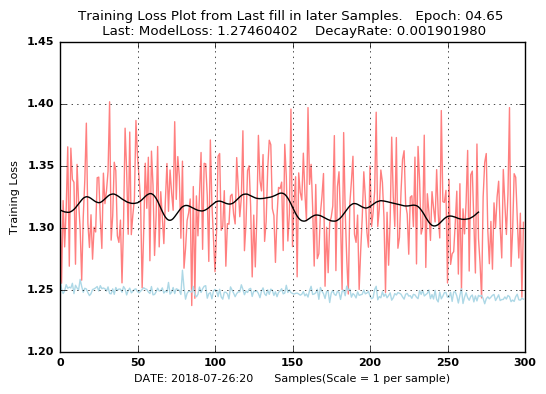

In [33]:
#matplotlib.colors
#b : blue. g : green. r : red. c : cyan. m : magenta. y : yellow. k : black. w : white.
import numpy as np
import matplotlib.pyplot as plt
import time
tt = np.load("TOTAL.npy")
#sc = np.load("aa-Numy-plot-k2.npy")
# Odd numbers of the single column
tt = tt[-300:]
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  







x = tt[:,0]
inc = range(len(x))
print len(x)
print len(inc)


#print tt[:,1]
y = tt[:,2]
#print tt[:,3]
#print tt[:,4]

"""
RNG = len(sc)/2
rng = len(sc)/20
raw = (sc - 0.5).cumsum()

#smooth = x.reshape(-1,1).mean(axis=1)
smooth = x.reshape(-1,5).mean(axis=1)
"""
#x1 = np.linspace(0, 1, RNG)
#x2 = np.linspace(0, 1, rng)
fig = plt.figure()

smooth = smoothListGaussian(y,degree=15)
smoothinc = range(len(smooth))

ax.plot(x, inc)
DT = time.strftime("%Y-%m-%d:%H")
A = "fill in later"
E 
#ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',Tloss="Tloss"
#       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )
fig, ax = plt.subplots(dpi=100)
ax.grid()
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',
       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )

#fig.patch.set_facecolor('xkcd:salmon')
plt.plot(inc, y, color= 'red', alpha = .5)
plt.plot(inc, x, color= 'lightblue')
plt.plot(smoothinc, smooth, color= 'black')
#print len(x2)
#print len(smooth)
#print smooth

#plt.show()

In [31]:
#matplotlib.colors
#b : blue. g : green. r : red. c : cyan. m : magenta. y : yellow. k : black. w : white.
import numpy as np
import matplotlib.pyplot as plt
sc = np.load("TOTAL.npy")
#sc = np.load("aa-Numy-plot-k2.npy")
# Odd numbers of the single column

x = sc[:,0]
for n in x:
    n=str(n)
    #n=n.replace(".","")
    N= n[-5:-1]
    N= float(N)
    if N<0.237:
        print n

1.2364
1.2369
1.2358
1.2367
1.2369
1.2359
1.2343
1.2361
1.2357
1.2366
1.2368
1.2362
1.2361


In [54]:
!th sample0.lua kolbrin/BASE-kolbrin_BASEkolbrin_GRU_current-learning-rate_0.000877235004_rnn-size_128,_train_loss_1.27927496,_epoch_91.28_evaluationloss_1.2364.t7 -temperature .6

447	
/home/jack/torch/install/bin/luajit: cannot open <kolbrin/BASE-kolbrin_BASEkolbrin_GRU_current-learning-rate_0.000877235004_rnn-size_128,_train_loss_1.27927496,_epoch_91.28_evaluationloss_1.2364.t7> in mode r  at /home/jack/torch/pkg/torch/lib/TH/THDiskFile.c:673
stack traceback:
	[C]: at 0x7f7eb6893ae0
	[C]: in function 'DiskFile'
	/home/jack/.luarocks/share/lua/5.1/torch/File.lua:405: in function 'load'
	sample0.lua:55: in main chunk
	[C]: in function 'dofile'
	/usr/local/lib/luarocks/rocks/trepl/scm-1/bin/th:150: in main chunk
	[C]: at 0x00405d50


In [45]:
!th sample0.lua kolbrin/BASE-kolbrin_BASEkolbrin_GRU_current-learning-rate_0.000553466361_rnn-size_128,_train_loss_1.32105888,_epoch_81.98_evaluationloss_1.2364.t7 -temperature .5

674	
Dastling. 

The doors of the place of granting the midst of the strength of the gods, and 
all mortal man who day as the way of our days and woman shall be a soul. 

The Spirit of His words are such a father of the words of man who has wasted to the stemple man who was the hand of the place and 
in the land and were protecting to me and all things shall be to be a fire of the path of the protection. 

The sense of the sky and the brothers were not even the barbarians for the waters and a servant of women. The 
creatures were formed and this is the copper of his substance of the sun and saying, "When the soul shall be not to which ever 
stricken into the land of woman. 

The time of the hearts of the forests shall be seen and was a light of the first become of the flowers and 
soul. The wisdom of Heaven and the read strong care the understanding of fire and in the 
form and soul, before the waters were 
set in the face of the high of the hands. 

The protecting companionship was th

In [ ]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

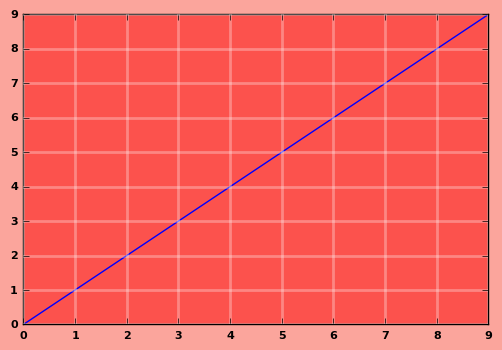

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure(dpi = 100)
fig.patch.set_facecolor('salmon')
fig.patch.set_alpha(0.7)
ax = fig.add_subplot(111)
ax.plot(range(10))
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.5)
ax.grid(color='w', alpha = .3, linestyle='-', linewidth=2)
# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

In [ ]:
https://matplotlib.org/tutorials/introductory/customizing.html#matplotlibrc-sample
    https://matplotlib.org/users/dflt_style_changes.html

4285
87.21
: 1.2406


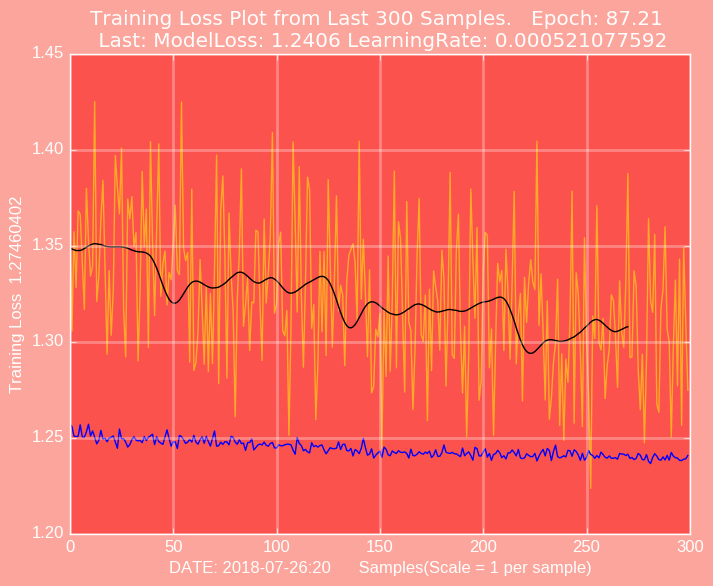

In [41]:
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
#                                                                                           9     3
import sqlite3
count = 0
LS = []
conn = sqlite3.connect("alice.db")
c = conn.cursor()
TOTAL = []
badchar = "seh_,rt"
c.execute('SELECT max(rowid) FROM quotes')
ID = c.fetchone()[0]
print ID

for row in c.execute("SELECT ROWID,content from quotes"):
    count = count +1
    inc = 0
    if count %2 == 0 and len(row[1])>3:
        inc = inc+1
        #print row[1]
        ls0 = row[1][-9:-3]
        ls1 = row[1][-31:-24]
        ls1 = str(ls1).translate(None, badchar)
        ls2 = row[1][-49:-36]
        ls2 = str(ls2).translate(None, badchar)
        ls3 = row[1][-65:-58]
        ls3 = str(ls3).translate(None, badchar)
        ls4 = row[1][-89:-74]
        ls4 = str(ls4).translate(None, badchar)
        ls0 = float(ls0);ls1 = float(ls1);ls2 = float(ls2)
        ls3 = float(ls3);ls4 = float(ls4)      
        if row[0]==2:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)        
        if row[0]>2 and row[0]<ID-1:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)
        if row[0]==ID-1:
            tot = ls0,ls1,ls2,ls3,ls4
            TOTAL.append(tot)    
        #print row[0],tot
#print count
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
# 
tt = np.asarray(TOTAL)
np.save("TOTAL", tt)


sc = np.load("TOTAL.npy")
sc = sc[:300]
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  

y = sc[:,0]
x = range(len(y))

Epoch = sc[:,1]
Ep = str(Epoch[-1])
print Ep

yy = sc[:,2]
xx = range(len(yy))

yy = sc[:,2]
xx = range(len(yy))

learningRate = sc[:,4]


smooth = smoothListGaussian(yy,degree=15)
smoothinc = range(len(smooth))


fig = plt.figure(dpi = 100)
fig.patch.set_facecolor('salmon')
fig.patch.set_alpha(0.7)
ax = fig.add_subplot(111)

ax.plot(xx, yy, color= 'yellow', alpha = .5)
plt.plot(smoothinc, smooth, color= 'black')

ax.plot(x, y, color = 'blue')

ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.5)

A = len(sc)
A = str(A)
X = str(y[-1])

LosR = str(yy[-1])
LR = str(learningRate[-1])

print ":",X
ax.grid(color='w', alpha = .3, linestyle='-', linewidth=2)
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss  '+LosR+'' ,  
       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+str(Ep)+' \n Last: ModelLoss: '+X+\
       ' LearningRate: '+LR+'')




# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

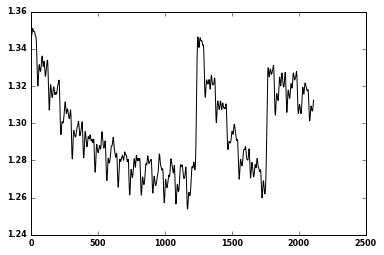

In [34]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
sc = np.load("TOTAL.npy")
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  


y = sc[:,0]
x = range(len(y))

yy = sc[:,2]
xx = range(len(yy))

smooth = smoothListGaussian(yy,degree=15)
smoothinc = range(len(smooth))


#fig = plt.figure(dpi = 100)
fig.patch.set_facecolor('salmon')
fig.patch.set_alpha(0.7)
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(xx, yy, color= 'yellow', alpha = .5)
plt.plot(smoothinc, smooth, color= 'black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.5)
ax.grid(color='w', alpha = .3, linestyle='-', linewidth=2)
DT = time.strftime("%Y-%m-%d:%H")
#ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',Tloss="Tloss"
#       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )
#fig, ax = plt.subplots(dpi=100)
ax.grid()
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss',
       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )




# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

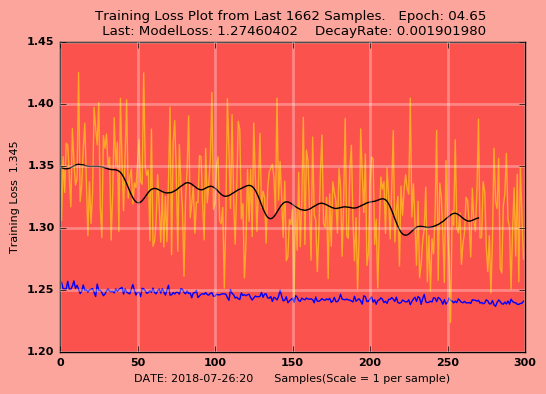

In [35]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
sc = np.load("TOTAL.npy")
sc = sc[:300]
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  


y = sc[:,0]
x = range(len(y))

yy = sc[:,2]
xx = range(len(yy))

smooth = smoothListGaussian(yy,degree=15)
smoothinc = range(len(smooth))


fig = plt.figure(dpi = 100)
fig.patch.set_facecolor('salmon')
fig.patch.set_alpha(0.7)
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.plot(xx, yy, color= 'yellow', alpha = .5)
plt.plot(smoothinc, smooth, color= 'black')
ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.5)

A = 1662
A = str(A)
x = str(1.345)

ax.grid(color='w', alpha = .3, linestyle='-', linewidth=2)
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss  '+x+'' ,  
       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+E+' \n Last: ModelLoss: '+LosR+"    DecayRate: "+DecR )




# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import random
## reset parameters
plt.rcParams.update(plt.rcParamsDefault)

plt.style.use('dark_background')
ZZ = random.choice(plt.style.available)
print ZZ

seaborn-darkgrid


43.6


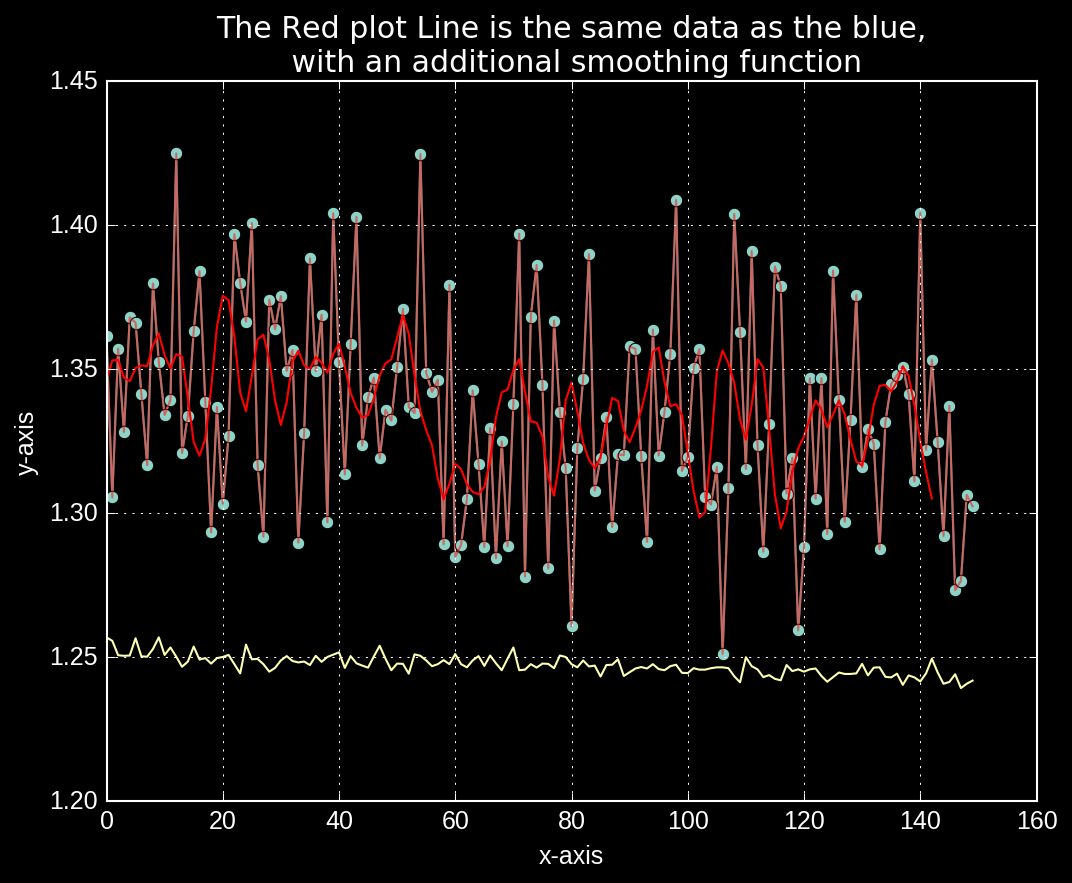

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random
## reset parameters
plt.rcParams.update(plt.rcParamsDefault)
ZZ = random.choice(plt.style.available)

plt.style.use(ZZ)

fig, ax = plt.subplots(dpi=150)
sc = np.load("TOTAL.npy")
sc = sc[:150]
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  

y = sc[:,0]
x = range(len(y))

Epoch = sc[:,1]
Ep = str(Epoch[-1])
print Ep

yy = sc[:,2]
xx = range(len(yy))

learningRate = sc[:,4]
L = 5
smooth = smoothListGaussian(yy,degree=4)
smoothinc = range(len(smooth))
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
ar = np.array(smooth)
use = ar + .07
uslen = len(use)
Use = range(uslen)
#plt.plot(Use, use, color= 'yellow')


ax.grid()
ax.plot(xx, yy, 'o-')
ax.plot(xx, yy, 'r', alpha= .5)
plt.plot(smoothinc, smooth, color = "red")
ax.plot(x, y)
"""
ax.grid(alpha = .8)
ax.plot(xx, yy, 'o-')
ax.plot(xx, yy, 'r', alpha= .5)
plt.plot(smoothinc, smooth, color= 'black')
ax.plot(x, y, 'red')
"""
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')


ax.set_title('The Red plot Line is the same data as the blue,\n with an additional smoothing function')
plt.show()

len(smoothinc): 111
len(yy):  150
d:  39
len(stretch):  143
Nin:  111
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
lenN:  111


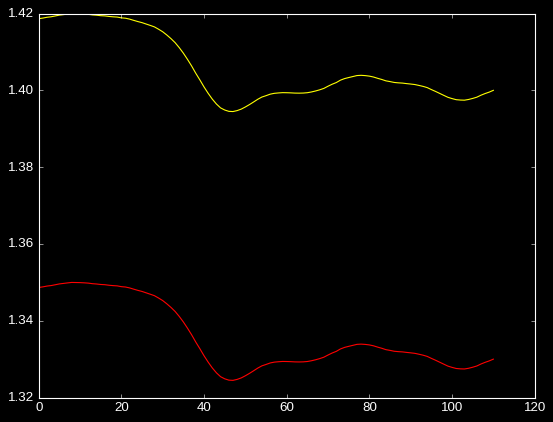

In [40]:
def SmoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  

smooth = SmoothListGaussian(yy,degree=20)
smoothinc = range(len(smooth))
print "len(smoothinc):",len(smoothinc)

print "len(yy): ",len(yy)
d=len(yy)-len(smoothinc)
print "d: ",d
stretch = np.arange(0.0, 100.0, .7)
print "len(stretch): ",len(stretch)
lists_of_lists = [smoothinc, smooth]
Nlist = [sum(x) for x in zip(*lists_of_lists)]
Nin = len(Nlist)
print "Nin: ",Nin
N = range(Nin)
print N
print "lenN: ",len(N)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
plt.plot(smoothinc, smooth, color= 'red')

ar = np.array(smooth)
use = ar + .07
uslen = len(use)
Use = range(uslen) 
plt.plot(Use, use, color= 'yellow')
ax.grid(alpha = .8)
#ax.plot(N, Nlist, 'blue')
#ax.plot(x, y, 'blue')
#ax.plot(smoothinc,smooth, 'yellow')
#ax.plot(N, Nlist, 'o-')
ax.plot(xx, yy, 'b')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')


ax.set_title('The Red plot Line is the same data as the blue,\n with an additional smoothing function')
plt.show()

In [200]:
import numpy as np
stretch = np.arange(0.0, 100.0, 0.7)
for num in stretch:
    print num,

0.0 0.7 1.4 2.1 2.8 3.5 4.2 4.9 5.6 6.3 7.0 7.7 8.4 9.1 9.8 10.5 11.2 11.9 12.6 13.3 14.0 14.7 15.4 16.1 16.8 17.5 18.2 18.9 19.6 20.3 21.0 21.7 22.4 23.1 23.8 24.5 25.2 25.9 26.6 27.3 28.0 28.7 29.4 30.1 30.8 31.5 32.2 32.9 33.6 34.3 35.0 35.7 36.4 37.1 37.8 38.5 39.2 39.9 40.6 41.3 42.0 42.7 43.4 44.1 44.8 45.5 46.2 46.9 47.6 48.3 49.0 49.7 50.4 51.1 51.8 52.5 53.2 53.9 54.6 55.3 56.0 56.7 57.4 58.1 58.8 59.5 60.2 60.9 61.6 62.3 63.0 63.7 64.4 65.1 65.8 66.5 67.2 67.9 68.6 69.3 70.0 70.7 71.4 72.1 72.8 73.5 74.2 74.9 75.6 76.3 77.0 77.7 78.4 79.1 79.8 80.5 81.2 81.9 82.6 83.3 84.0 84.7 85.4 86.1 86.8 87.5 88.2 88.9 89.6 90.3 91.0 91.7 92.4 93.1 93.8 94.5 95.2 95.9 96.6 97.3 98.0 98.7 99.4


In [240]:
import numpy as np
#from scipy.signal import savitzky_golay
import scipy.signal
help(scipy.signal)
#yhat = savitzky_golay.savitzky_golay(y, 51, 3)

Help on package scipy.signal in scipy:

NAME
    scipy.signal

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/scipy/signal/__init__.py

DESCRIPTION
    Signal processing (:mod:`scipy.signal`)
    
    Convolution
    
    .. autosummary::
       :toctree: generated/
    
       convolve           -- N-dimensional convolution.
       correlate          -- N-dimensional correlation.
       fftconvolve        -- N-dimensional convolution using the FFT.
       convolve2d         -- 2-dimensional convolution (more options).
       correlate2d        -- 2-dimensional correlation (more options).
       sepfir2d           -- Convolve with a 2-D separable FIR filter.
       choose_conv_method -- Chooses faster of FFT and direct convolution methods.
    
    B-splines
    
    .. autosummary::
       :toctree: generated/
    
       bspline        -- B-spline basis function of order n.
       cubic          -- B-spline basis function of order 3.
       quadratic      -- B-spline basis

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
#yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
yhat = savitzky_golay(y, 51, 3) # window size 51, polynomial order 3

plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.show()

NameError: name 'savitzky_golay' is not defined

4285
87.21
: 1.2406


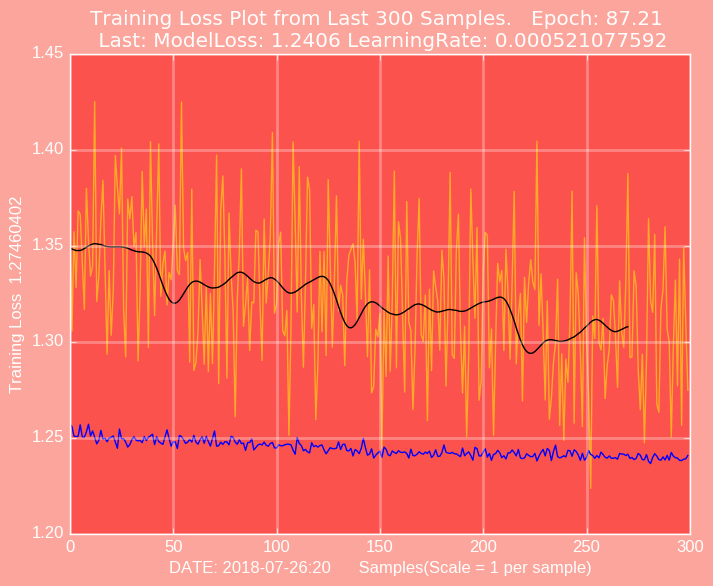

In [41]:
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
#                                                                                           9     3
import sqlite3
count = 0
LS = []
conn = sqlite3.connect("alice.db")
c = conn.cursor()
TOTAL = []
badchar = "seh_,rt"
c.execute('SELECT max(rowid) FROM quotes')
ID = c.fetchone()[0]
print ID

for row in c.execute("SELECT ROWID,content from quotes"):
    count = count +1
    inc = 0
    if count %2 == 0 and len(row[1])>3:
        inc = inc+1
        #print row[1]
        ls0 = row[1][-9:-3]
        ls1 = row[1][-31:-24]
        ls1 = str(ls1).translate(None, badchar)
        ls2 = row[1][-49:-36]
        ls2 = str(ls2).translate(None, badchar)
        ls3 = row[1][-65:-58]
        ls3 = str(ls3).translate(None, badchar)
        ls4 = row[1][-89:-74]
        ls4 = str(ls4).translate(None, badchar)
        ls0 = float(ls0);ls1 = float(ls1);ls2 = float(ls2)
        ls3 = float(ls3);ls4 = float(ls4)      
        if row[0]==2:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)        
        if row[0]>2 and row[0]<ID-1:
            tot = ls0,ls1,ls2,ls3,ls4,
            TOTAL.append(tot)
        if row[0]==ID-1:
            tot = ls0,ls1,ls2,ls3,ls4
            TOTAL.append(tot)    
        #print row[0],tot
#print count
#learning-rate_0.001200000000_rnn-size_128,_train_loss_1.36140064,_epoch_0.29_evaluationloss_1.2569.t7
# 
tt = np.asarray(TOTAL)
np.save("TOTAL", tt)


sc = np.load("TOTAL.npy")
sc = sc[:300]
def smoothListGaussian(list,degree=15):  
    window=degree*2-1  
    weight=np.array([1.0]*window)  
    weightGauss=[]  
    for i in range(window):  
        i=i-degree+1  
        frac=i/float(window)  
        gauss=1/(np.exp((4*(frac))**2))  
        weightGauss.append(gauss)  
    weight=np.array(weightGauss)*weight  
    smoothed=[0.0]*(len(list)-window)  
    for i in range(len(smoothed)):  
        smoothed[i]=sum(np.array(list[i:i+window])*weight)/sum(weight)  
    return smoothed  

y = sc[:,0]
x = range(len(y))

Epoch = sc[:,1]
Ep = str(Epoch[-1])
print Ep

yy = sc[:,2]
xx = range(len(yy))

yy = sc[:,2]
xx = range(len(yy))

learningRate = sc[:,4]


smooth = smoothListGaussian(yy,degree=15)
smoothinc = range(len(smooth))


fig = plt.figure(dpi = 100)
fig.patch.set_facecolor('salmon')
fig.patch.set_alpha(0.7)
ax = fig.add_subplot(111)

ax.plot(xx, yy, color= 'yellow', alpha = .5)
plt.plot(smoothinc, smooth, color= 'black')

ax.plot(x, y, color = 'blue')

ax.patch.set_facecolor('red')
ax.patch.set_alpha(0.5)

A = len(sc)
A = str(A)
X = str(y[-1])

LosR = str(yy[-1])
LR = str(learningRate[-1])

print ":",X
ax.grid(color='w', alpha = .3, linestyle='-', linewidth=2)
ax.set(xlabel='DATE: '+DT+'      Samples(Scale = 1 per sample)', ylabel='Training Loss  '+LosR+'' ,  
       title='Training Loss Plot from Last '+A+' Samples.   Epoch: '+str(Ep)+' \n Last: ModelLoss: '+X+\
       ' LearningRate: '+LR+'')




# If we don't specify the edgecolor and facecolor for the figure when
# saving with savefig, it will override the value we set earlier!
fig.savefig('temp.png', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()